In [ ]:
#based on the manual rewatching of the videos
#the x coordinates for the reach should be from 350 (start) to 420 (pellet)
#the y coordinates for the reach should be from 260 (start) to 320 (pellet)

In [22]:
%matplotlib notebook
from matplotvideo import attach_video_player_to_figure
import matplotlib.pyplot as plt
import pandas as pd

folder = '12wo/'
video_name = folder + 'mj_13_15_25_ncb1788-camB.mp4'
plot_name = folder + 'mj_13_15_25_ncb1788-camBDLC_dlcrnetms5_LeftCenter_mirror_miniscopeNov27shuffle1_1000000.csv'
scalar_name = folder + 'mj_13_15_25_ncb1788-camBDLC_dlcrnetms5_LeftCenter_mirror_miniscopeNov27shuffle1_1000000_filtered_scalars.h5'
usecols = ['x.2','y.2']

paw = pd.read_csv(plot_name, header=2, usecols=usecols) 

In [18]:
data = paw['y.2'].reset_index()
data = paw['y.2'].reindex(data['index'].values/25).reset_index()

data.head(5)

,index,y.2
0,0.00,283.525604
1,0.04,NaN
2,0.08,NaN
3,0.12,NaN
4,0.16,NaN


<IPython.core.display.Javascript object>


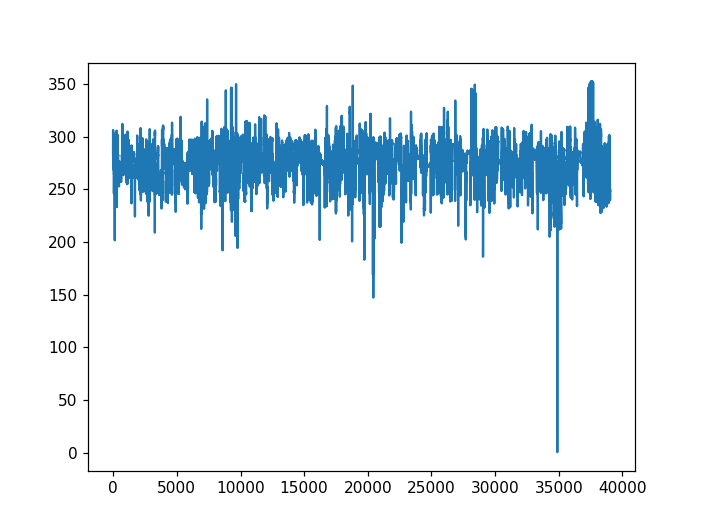

In [17]:
timestamps = data['index'].values
y = data['y.2'].values
x = [timestamp - 10 for timestamp in timestamps]
plt.plot(x,y)

In [29]:
paw = pd.read_hdf(scalar_name, key='cleared_data')
paw.rename(columns={'paw_y':'y.2'}, inplace=True)
paw.head(10)

,paw_x,y.2,likelihood,dx,dy,dE,z_time,time_diff,velocity,acceleration,jerk
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>


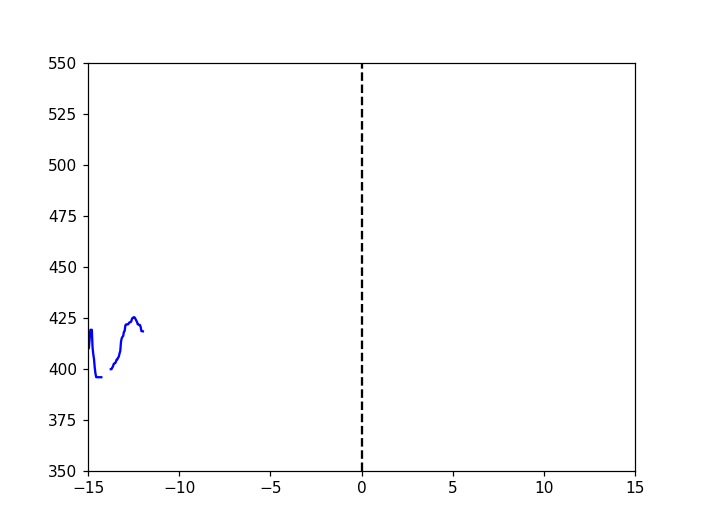

In [31]:

# (timestamp, value) pairs

data = paw['y.2'].reset_index()
data['time'] = data['index'].values/25

def on_frame(video_timestamp, line):
    timestamps = data['time'].values
    y = data['y.2'].values
    x = [timestamp - video_timestamp for timestamp in timestamps]

    line.set_data(x, y)
    #line.axes.relim()
    line.axes.set_ylim([350,550])
    line.axes.autoscale_view()
    line.axes.figure.canvas.draw()


def main(video_name):
    fig, ax = plt.subplots()
    plt.xlim(-15, 15)
    plt.axvline(x=0, color='k', linestyle='--')

    line, = ax.plot([], [], color='blue')

    attach_video_player_to_figure(fig, video_name, on_frame, line=line)

    plt.show()


main(video_name)